In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import check_random_state
from swarmlib import FUNCTIONS

In [2]:
class TeachingLearning(object):

    def __init__(self, func, lower_bound, upper_bound,n_population=50,random_state=None):

        self.function = func # function to minimize
        self.lower_bound = lower_bound # lower bound
        self.upper_bound = upper_bound # upper bound
        self.index = list(range(n_population)) # population indexes
        self.dimension = lower_bound.shape[0]  # columns basicalyy our dimensions
        self.random_state = check_random_state(random_state) # random state
        self.population = self.random_state.rand(n_population, self.dimension) * (upper_bound - lower_bound) + lower_bound
        self.fitness = np.apply_along_axis(self.function, 1, self.population)
        self.fit_index = np.argmin(self.fitness)

    def best(self, num=1):
        bestidxs = np.argmin(self.fitness)
        return self.population[bestidxs], self.fitness[bestidxs]

    def classroom(self):
        mean = np.nanmean(self.population, axis=0)  # column mean.
        rs = self.random_state
        teacher = np.argmin(self.fitness)  # select teacher index from the fitness arrayy using argmin

        # teaching phase
        for i in self.index:
            T_F = 1+rs.randint(0,2)  # teaching factor is randomly 1 or 2.
            r_i = rs.rand(self.dimension)  # multiplier also random. 1 row * 13 columns

            new_solution = self.population[i] + (r_i * (teacher - (T_F * mean))) # new solution 1 row * 13 columns
            new_solution = np.minimum(np.maximum(new_solution, self.lower_bound), self.upper_bound)

            new_fitness = self.function(new_solution)

            if new_fitness < self.fitness[i]:
                self.population[i] = new_solution
                self.fitness[i] = new_fitness

        # Until Here we find a fitness from teacher
        # learning phase
        for i in self.index:

            j = rs.choice(self.index[:i] + self.index[(i + 1):], 1)  # pick another random i!=j 
            r_i = rs.rand(self.dimension)

            if self.fitness[i] < self.fitness[j]:
                new_solution = self.population[i] + r_i * (self.population[i] - self.population[j]).flatten()
            else:
                new_solution = self.population[i] + r_i * (self.population[j] - self.population[i]).flatten()

            new_solution = np.minimum(np.maximum(new_solution, self.lower_bound), self.upper_bound)
            new_fitness = self.function(new_solution)

            if new_fitness < self.fitness[i]:
                self.population[i] = new_solution
                self.fitness[i] = new_fitness

In [3]:
def fitness_function_1(position):
    # print("position =  {}".format(position))
    x=[]
    for i in range(13):
        x.append(position[i])
    t1,t2,t3 = 0,0,0
    for i in range(4):
        t1 += x[i]
        t2 += x[i]*x[i]
    for i in range(4,13):
        t3 += x[i]
    fitness_value = 5*t1 - 5*t2 - t3
    #calculate constraint violation
    g = [0]*9
    g[0] = 2*x[0] + 2*x[1] + x[9] + x[10] - 10
    g[1] = 2*x[0] + 2*x[2] + x[9] + x[11] - 10
    g[2] = 2*x[1] + 2*x[2] + x[10] + x[11] - 10
    g[3] = -8*x[0] + x[9]
    g[4] = -8*x[1] + x[10]
    g[5] = -8*x[2] + x[11]
    g[6] = -2*x[3] - x[4] + x[9]
    g[7] = -2*x[5] - x[6] + x[10]
    g[8] = -2*x[7] - x[8] + x[11]
    #returning a very large value if any constraint is violated
    for i in range(9):
        if g[i] > 0:
            return g[i]*10000000000
    return fitness_value

In [4]:
def fitness_function_3(position):
    x=[]
    for i in range(7):
        x.append(position[i])
    fitness_value = (x[0]-10)**2 + 5*(x[1]-12)**2 + x[2]**4 + 3*(x[3]-11)**2 + 10*x[4]**6 + 7*x[5]**2 + x[6]**4 - 4*x[5]*x[6] - 10*x[5] - 8*x[6]    #calculate constraint violation
    g = [0]*4
    g[0] = -127 + 2*x[0]**2 + 3*x[1]**4 + x[2] + 4*x[3]**2 + 5*x[4]
    g[1] = -282 + 7*x[0] + 3*x[1] + 10*x[2]**2 + x[3] - x[4]
    g[2] = -196 + 23*x[0] + x[1]**2 + 6*x[5]**2 - 8*x[6]
    g[3] = 4*(x[0]**2) + x[1]**2 - (3*(x[0]*x[1]))+ 2*(x[2]**2) + 5*x[5] - (11*x[6])
    for i in range(4):
        if g[i]>0:
            return g[i]*10000000000
    return fitness_value

In [5]:
def pressure_vessel(position):
    x=[]
    for i in range(4):
        x.append(position[i])
    fitness_value = 0.6224*x[0]*x[2]*x[3] + 1.7781*x[2]*x[2]*x[1] + 3.1661*x[0]*x[0]*x[3] + 19.84*x[0]*x[0]*x[2]
    #calculate constraint violation
    g = [0]*4
    g[0] = -x[0] + 0.0193*x[2]
    g[1] = -x[1] + 0.00954*x[2]
    g[2] = - (np.pi) * x[2] * x[2] * x[3] - (4/3)*(np.pi)*x[2]*x[2]*x[2] + 1296000
    g[3] = x[3] - 240
    for i in range(4):
        if g[i]>0:
            return g[i]*100000000000
    return fitness_value

TLBO solution  [1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 3. 1.]  fitness  -15.0


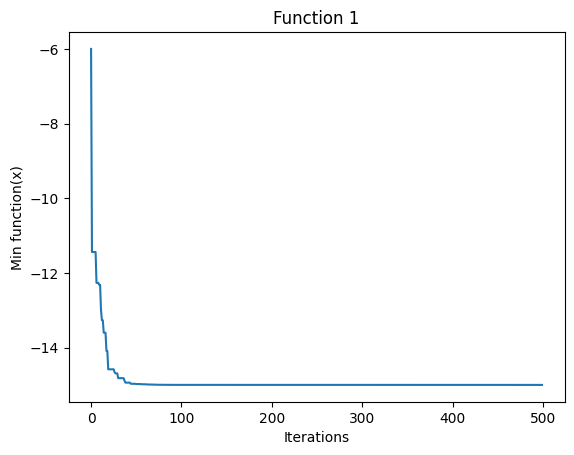

In [10]:
"""First Fitness Function"""
lower= np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
upper= np.array([1,1,1,1,1,1,1,1,1,100,100,100,1])
population = 50
max_iter = 500

X = TeachingLearning(fitness_function_1, lower,upper, n_population=population, random_state=40)
data1 = []
for i in range(max_iter):
    X.classroom()
    solution, fitness = X.best()
    data1.append(fitness)
print("TLBO solution ",solution," fitness ",fitness)
plt.plot(data1)
plt.title("Function 1")
plt.xlabel("Iterations")
plt.ylabel("Min function(x)")   
plt.show()
plt.close()

TLBO solution  [ 2.31928578  1.95618442 -0.44366152  4.3555796  -0.62662468  1.1149029
  1.61184496]  fitness  680.6925453440599


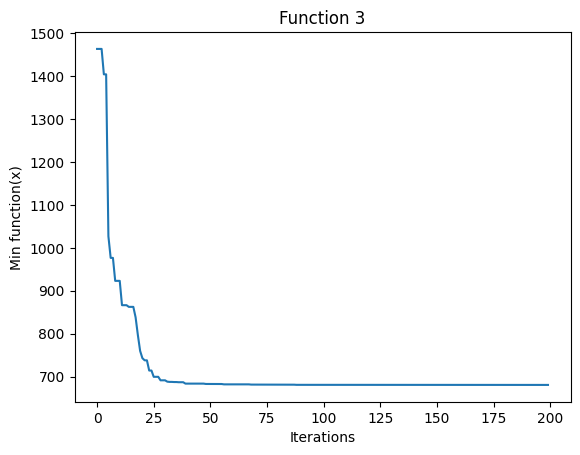

In [7]:
"""Third Fitness Function"""
lower = np.array([-10,-10,-10,-10,-10,-10,-10])
upper = np.array([10,10,10,10,10,10,10])
population = 50
max_iter = 200
X = TeachingLearning(fitness_function_3, lower,upper, n_population=population, random_state=10)
data2 = []
for i in range(max_iter):
    X.classroom()
    solution, fitness = X.best()
    data2.append(fitness)
print("TLBO solution ",solution," fitness ",fitness)
plt.plot(data2)
plt.title("Function 3")
plt.xlabel("Iterations")
plt.ylabel("Min function(x)")   
plt.show() 
plt.close()

TLBO solution  [  0.80382827   0.40232322  41.62107824 182.76693743]  fitness  5952.480584423244


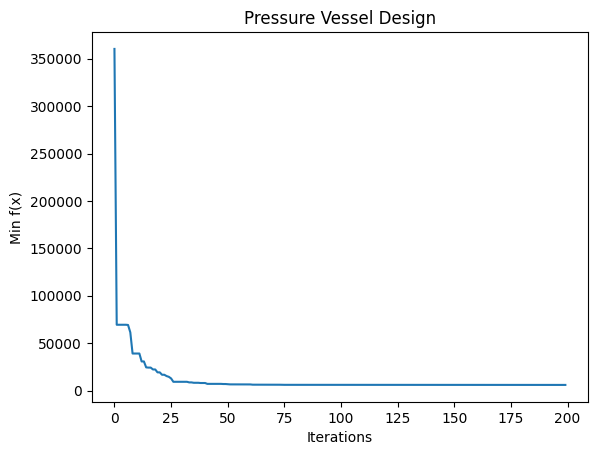

In [8]:
"""Pressue Vessel Design"""
lower = np.array([0,0,10,10])
upper = np.array([99,99,200,200])
population = 50
max_iter = 200

X = TeachingLearning(pressure_vessel, lower,upper, n_population=population, random_state=50)
data3 = []
for i in range(max_iter):
    X.classroom()
    solution, fitness = X.best()

    data3.append(fitness)
print("TLBO solution ",solution," fitness ",fitness)
plt.plot(data3,label='Pressure Vessel Function')
plt.title("Pressure Vessel Design")
plt.xlabel("Iterations")
plt.ylabel("Min f(x)")   
plt.show()

TLBO solution  [-2.11731937e-09 -6.39369004e-10]  fitness  0.0


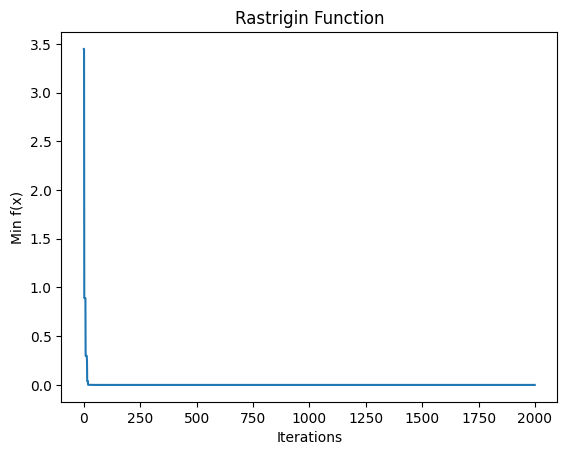

In [9]:
# FUNCTIONS['rastrigin']
"""Rastrigin Standard Function"""

lower = np.array([-5.12,-5.12])
upper = np.array([5.12,5.12])
population = 50
max_iter = 2000

X = TeachingLearning(FUNCTIONS['rastrigin'], lower,upper, n_population=population, random_state=50)
data4 = []
for i in range(max_iter):
    X.classroom()
    solution, fitness = X.best()
    data4.append(fitness)
print("TLBO solution ",solution," fitness ",fitness)
plt.plot(data4)
plt.title("Rastrigin Function")
plt.xlabel("Iterations")
plt.ylabel("Min f(x)")   
plt.show()


TLBO solution  [-1.17024784e-17  1.62968980e-16]  fitness  0.0


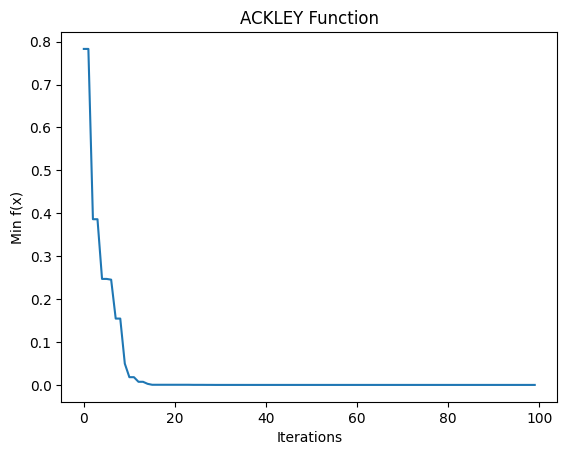

In [14]:
"""ACKLEY"""
lower = np.array([-5,-5])
upper = np.array([5,5])
population = 50
max_iter = 100

X = TeachingLearning(FUNCTIONS['ackley'], lower,upper, n_population=population, random_state=50)
data5 = []
for i in range(max_iter):
    X.classroom()
    solution, fitness = X.best()
    data5.append(fitness)
print("TLBO solution ",solution," fitness ",fitness)
plt.plot(data5)
plt.title("ACKLEY Function")
plt.xlabel("Iterations")
plt.ylabel("Min f(x)")   
plt.show()


TLBO solution  [-4.88209837e-09]  fitness  0.0


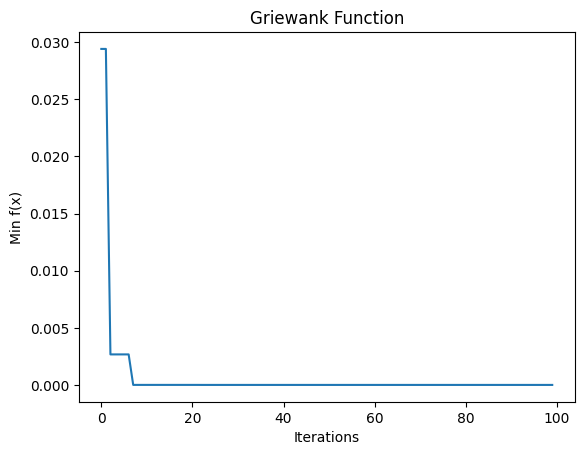

In [16]:

"""griewank"""
lower = np.array([-600])
upper = np.array([600])
population = 50
max_iter = 100

X = TeachingLearning(FUNCTIONS['griewank'], lower,upper, n_population=population, random_state=50)
data6 = []
for i in range(max_iter):
    X.classroom()
    solution, fitness = X.best()
    data6.append(fitness)
print("TLBO solution ",solution," fitness ",fitness)
plt.plot(data6)
plt.title("Griewank Function")
plt.xlabel("Iterations")
plt.ylabel("Min f(x)")   
plt.show()
plt.close()

TLBO solution  [-0.54719754 -1.54719755]  fitness  -1.9132229549810367


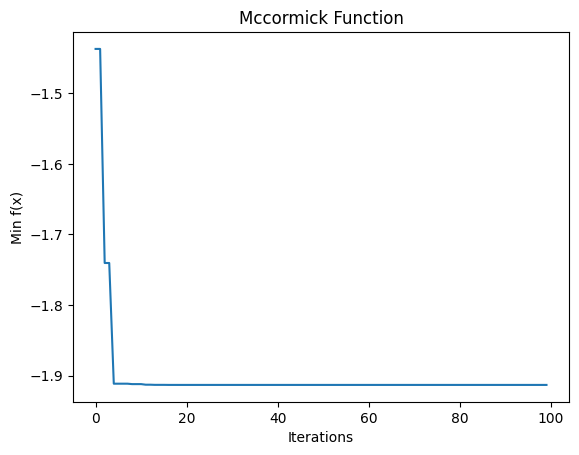

In [21]:
'''
    McCormick Function

    global minimum: f(x=-0.54719, y=-1.54719) = -1.9133
    bounds:
        -1.5 <= x <= 4
        -3 <= y <= 4
'''
lower = np.array([-1.5,-3])
upper = np.array([4,4])
population = 50
max_iter = 100

X = TeachingLearning(FUNCTIONS['mccormick'], lower,upper, n_population=population, random_state=50)
data7 = []
for i in range(max_iter):
    X.classroom()
    solution, fitness = X.best()
    data7.append(fitness)
print("TLBO solution ",solution," fitness ",fitness)
plt.plot(data7)
plt.title("Mccormick Function")
plt.xlabel("Iterations")
plt.ylabel("Min f(x)")   
plt.show()
plt.close()